<h1 align="center"> SANTANDER CHALLENGE PROJECT </h1>
<br>
<center>University of Rome “Tor Vergata” - Master Big Data in Business 2019</center>
<br>
<div style='text-align: right'>27/06/2019<br> Federico Francone</div>

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/Colab\ Notebooks  

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


In [2]:
import pandas as pd
import numpy as np
from sklearn  import preprocessing, decomposition
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, Lasso
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, validation_curve, KFold
from sklearn.model_selection import RandomizedSearchCV, cross_validate
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, make_scorer, roc_curve, f1_score, precision_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [47]:
cnf_matrix= np.array([[1, 1, 3],[3, 2, 2],[1, 3, 1]])
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
print('FP è somma per colonne',cnf_matrix.sum(axis=0), 'meno la diagonale. Cioè per prima colonna, label 0, \
io predico sempre che apaprtengono a classe 0, ma in realta quelli a 2° e 3° riga sono altre classi, quindi sono False Positive \n\
Invece sulla prima riga, la Gold Label è che appartengono a classe 0, ma 2° e 3° colonna li ho predetti come classe 1 e 2. Sono False Negative \n')
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
print(cnf_matrix, '\n\n FP', FP, '\n FN', FN, '\n TP', TP, '\n TN', TN)
print('\n medie FP e FN sono sempre uguali: ', np.mean(FP), np.mean(FN))

# Sensitivity, hit rate, recall, or true positive rate
 
print('\n reacall TPR = TP/(TP+FN)', TP/(TP+FN))
# Precision or positive predictive value
print('\n precision PPV = TP/(TP+FP)', TP/(TP+FP))
print('\n Se diminuisce FN, quindi "errori su righe", aumenta recall. \n Se diminuisce FP, quindi "errori per colonna", aumenta precision.')

FP è somma per colonne [5 6 6] meno la diagonale. Cioè per prima colonna, label 0, io predico sempre che apaprtengono a classe 0, ma in realta quelli a 2° e 3° riga sono altre classi, quindi sono False Positive 
Invece sulla prima riga, la Gold Label è che appartengono a classe 0, ma 2° e 3° colonna li ho predetti come classe 1 e 2. Sono False Negative 

[[1 1 3]
 [3 2 2]
 [1 3 1]] 

 FP [4 4 5] 
 FN [4 5 4] 
 TP [1 2 1] 
 TN [8 6 7]

 medie FP e FN sono sempre uguali:  4.333333333333333 4.333333333333333

 reacall TPR = TP/(TP+FN) [0.2        0.28571429 0.2       ]

 precision PPV = TP/(TP+FP) [0.2        0.33333333 0.16666667]

 Se diminuisce FN, quindi "errori su righe", aumenta recall. 
 Se diminuisce FP, quindi "errori per colonna", aumenta precision.


In [2]:
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd:goldenrod', 'xkcd:cadet blue', 
          'xkcd:scarlet']

In [3]:
data = pd.read_csv("./dataset.csv", delimiter=';')
data.set_index('ID', inplace=True)
# last column is target, store in array t
t = data.as_matrix(['TARGET'])

"""# count number of positive and negative items
c, counts = np.unique(t, return_counts=True)
negative = counts[0]
positive = counts[1]"""


C:\Users\feder\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [4]:
data.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
ID,,,,,,,,,,,,,,,,,,,,,
21638,2,40,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99968.40,1
119266,2,46,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99946.59,0
108190,2,23,0.0,103.35,103.35,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99921.81,0
105047,2,23,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99909.60,1
51076,2,28,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99863.61,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6016 entries, 21638 to 151804
Columns: 370 entries, var3 to TARGET
dtypes: float64(111), int64(259)
memory usage: 17.0 MB


Evaluate degree of sparsity of original matrix

In [6]:
from numpy import count_nonzero
print("DEGREE OF SPARSITY OF MATRIX: ", (1.0 - count_nonzero(data) / data.size).round(3) * 100, '%')

DEGREE OF SPARSITY OF MATRIX:  91.5 %


## First step of Feature Elimination (the absolute irrelevant ones)

#### TAKING OFF COLUMNS WHERE MAX()= MIN(): it means there is the same value for all the rows, which means such values is not discriminant. 
- 103 rows deleted: from 370 to 267

In [7]:
null_cols= []
for i in range (len(data.columns)):
    if data.iloc[:, i].max()== data.iloc[:, i].min():
        null_cols.append(i)

In [8]:
data= data.iloc[:, [index for index in list(range(0,370)) if index not in null_cols]]
data.info()   #267 columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6016 entries, 21638 to 151804
Columns: 267 entries, var3 to TARGET
dtypes: float64(93), int64(174)
memory usage: 12.3 MB


In [9]:
#Più semplicemente potevo togliere quelle con standard deviation zero, che significa che ho sempre lo stesso valore.
# data= data[data.columns[data.std()!=0]].head(2)

filling NaN with mean of the column

In [10]:
data= data.groupby(data.columns, axis = 1).transform(lambda x: x.fillna(x.mean()))

In [11]:
# list of features, including target
features = data.columns
X = data[features[:-1]]

In [12]:
data['TARGET'].value_counts()  #baseline is 50% accuracy, classes perfectly balanced

1    3008
0    3008
Name: TARGET, dtype: int64

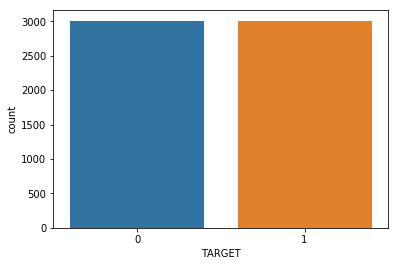

In [13]:
sns.countplot(data['TARGET'])

Evaluate degree of sparsity of matrix without the zero columns

In [14]:
print("DEGREE OF SPARSITY OF MATRIX: ", (1.0 - count_nonzero(data) / data.size).round(3) * 100, '%')

DEGREE OF SPARSITY OF MATRIX:  88.2 %


## TRAIN TEST SPLIT AND SCALING

### Decisione di standardizzare invece che normalizzare (sulle performance ho notato che cambia poco tra le due)

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(data.drop(labels=['TARGET'], axis=1), data['TARGET'],test_size=0.25,random_state=0)
#standardizer = Pipeline([('standardizzo', StandardScaler().fit_transform())])

#standardizzo train

scaler=StandardScaler()
X_train_scaled=  pd.DataFrame(scaler.fit_transform(X_train), columns= X_train.columns)

#standardizzo test. Uso mean e standard deviation che ho visto nel training, quindi faccio solo .transform() 
#(non avrebbe senso fare .fit per il test, barerei!)

scaled_test= scaler.transform(X_test)
scaled_test= pd.DataFrame(scaled_test, columns= X_test.columns)

X_train_scaled.head(2)

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var17_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,0.033290,-0.960583,0.173667,0.521308,0.710403,-0.048883,-0.059525,-0.040587,-0.041514,-0.053949,...,-0.021393,-0.021033,-0.014889,-0.01874,-0.019391,-0.017793,-0.014889,-0.021619,-0.021363,-0.156780
1,0.036476,1.747971,-0.063103,-0.223953,-0.241413,-0.048883,-0.059525,-0.040587,-0.041514,-0.053949,...,-0.021393,-0.021033,-0.014889,-0.01874,-0.019391,-0.017793,-0.014889,-0.021619,-0.021363,0.658623


*mean should be zero and standard deviation should be 1 for each column: it is not like this for computational reasons (https://stackoverflow.com/questions/40405803/mean-of-data-scaled-with-sklearn-standardscaler-is-not-zero). The numbers are extremely close to 0 and 1, indeed after I show that rounding the numbers to 3 digits, they are exactly 0 and 1*

In [16]:
"""without rounding"""
X_train_scaled['var3'].describe()  

count    4.512000e+03
mean    -4.725553e-16
std      1.000111e+00
min     -3.002332e+01
25%      3.328979e-02
50%      3.328979e-02
75%      3.328979e-02
max      3.993230e-02
Name: var3, dtype: float64

In [17]:
print('mean of standardized columns \n', X_train_scaled.mean(axis = 0).round(2)[:5])
print('\nstd of standardized columns \n', X_train_scaled.std(axis = 0).round(2)[:5])
#format(X_train_scaled['var3'].describe().loc['mean'], '.2f')

mean of standardized columns 
 var3                      -0.0
var15                      0.0
imp_ent_var16_ult1        -0.0
imp_op_var39_comer_ult1   -0.0
imp_op_var39_comer_ult3   -0.0
dtype: float64

std of standardized columns 
 var3                       1.0
var15                      1.0
imp_ent_var16_ult1         1.0
imp_op_var39_comer_ult1    1.0
imp_op_var39_comer_ult3    1.0
dtype: float64


In [18]:
scaled_test.head(2)

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var17_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,0.03329,-1.037971,0.007928,-0.223953,-0.241413,-0.048883,-0.059525,-0.040587,-0.041514,-0.053949,...,-0.021393,-0.021033,-0.014889,-0.01874,-0.019391,-0.017793,-0.014889,-0.021619,-0.021363,0.135227
1,0.03329,0.974099,-0.063103,-0.223953,-0.241413,-0.048883,-0.059525,-0.040587,-0.041514,-0.053949,...,-0.021393,-0.021033,-0.014889,-0.01874,-0.019391,-0.017793,-0.014889,-0.021619,-0.021363,-0.845232


IMPROVEMENT OF SPARSITY SCORE for scaled matrix from 89% to 2%

In [19]:
print("DEGREE OF SPARSITY OF SCALED MATRIX: ", (1.0 - count_nonzero(X_train_scaled) / X_train_scaled.size).round(3) * 100, '%')

DEGREE OF SPARSITY OF SCALED MATRIX:  1.5 %


In [20]:
# naming conventions. Pongo uguali gli oggetti cosi li posso chiamare in qualsiasi modo tra questi
y_train, y_test= Y_train, Y_test
x_test_scaled= scaled_test
scaled_train= X_train_scaled

# Real Feature Selection for Logistic Regression
1. **First attempt creating a function which iteratively eliminates columns with highest p-values**
2. **Using Lasso regularization to eliminate columns**

In [21]:
import statsmodels.formula.api as sm

In [28]:
"""Example"""
log_reg_intercept= sm.Logit(endog=t, exog= X.iloc[:,:10]).fit()
log_reg_intercept.summary2()

Optimization terminated successfully.
         Current function value: 0.687613
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:                Logit              Pseudo R-squared:   0.008     
Dependent Variable:   y                  AIC:                8293.3588 
Date:                 2019-07-01 10:49   BIC:                8360.3806 
No. Observations:     6016               Log-Likelihood:     -4136.7   
Df Model:             9                  LL-Null:            -4170.0   
Df Residuals:         6006               LLR p-value:        7.0772e-11
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       9.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
var3                     0.0000   0.0000  1.0008 0.3169 -0.0000  0.0000
var15                    0.0046   0.0007  6.6444 0.0000  0.0032  0.0060
imp_ent_var16_ult1      -0.0000   0.0000 -0.3239 0.7460 -0.0000  0.0000
imp_op_var39_comer_ult1  0.0005   0.0002  2.6121 0.0090  0.0001  0.0009
imp_op_var39_comer_ult3 -0.0004   0.0001 -2.7368 0.0062 -0.0007 -0.0001
imp_op_var40_comer_ult1 -0.0004   0.0015 -0.2614 0.7938 -0.0033  0.0025
imp_op_var40_comer_ult3 -0.0015   0.0012 -1.2155 0.2242 -0.0039  0.0009
imp_op_var40_efect_ult1  0.0101   0.0080  1.2658 0.2056 -0.0056  0.0258
imp_op_var40_efect_ult3 -0.0013   0.0032 -0.4206 0.6740 -0.0076  0.0049
imp_op_var40_ult1        0.0016   0.0014  1.1323 0.2575 -0.0012  0.0043
=======================================================================

"""

### 1st WAY: I create a function that given a treshold of the maximum p-value (10%), eliminates at each step the column having the maximum p-value (if higher than the treshold)**

In [38]:
#valid_columns= list(df_X_opt.columns)
treshold= 0.1
#index_useless= []
def backwardEliminationDf(X, sl, y):
    numVars = len(X.columns)
    #print('initial len of valid_columns is: ', len(valid_columns))
    print('numVars is ', numVars)
    for i in range(0, numVars):  #if I have 31 variables, I'll do maximum 31 steps (deleting everything)
        print('ITRATION NUMBER {}'.format(i))
        logistic_regressor = sm.Logit(y, X).fit()
        maxVar = max(logistic_regressor.pvalues)              #.astype(float)
        print('the maximum p-value is: ', maxVar)
        if maxVar > sl:
            for col in X.columns:   #numVars-i perchè all'inizio ne ho 31, se il gioco va avanti, poi ne ho
                                            # 30, poi 29...fino a 1. Quando si ferma l'if non viene eseguito...
                if (logistic_regressor.pvalues[col] == maxVar):   #pvalues[j].astype(float)
                    #X = np.delete(X, j, 1)       # take off the j-th variable, the one with highest p-value
                    #index_useless.append(j)
                    print('droppo la colonna:', col)
                    X= X.drop(col, axis=1)
                    print('\n N° COLONNE DI X A QUESTA ITERAZIONE:', len(X.columns))
                    #if len(X)< 7043:
                        #print('\n\n LEN OF X is: ', len(X))
        print('\n\n')
    logistic_regressor.summary()
    return X
 
X_Modeled = backwardEliminationDf(X.iloc[:,:5], treshold, t)

numVars is  5
ITRATION NUMBER 0
Optimization terminated successfully.
         Current function value: 0.688633
         Iterations 4
the maximum p-value is:  0.7377819622081188
droppo la colonna: imp_ent_var16_ult1

 N° COLONNE DI X A QUESTA ITERAZIONE: 4



ITRATION NUMBER 1
Optimization terminated successfully.
         Current function value: 0.688643
         Iterations 4
the maximum p-value is:  0.3168467475161003
droppo la colonna: var3

 N° COLONNE DI X A QUESTA ITERAZIONE: 3



ITRATION NUMBER 2
Optimization terminated successfully.
         Current function value: 0.688732
         Iterations 4
the maximum p-value is:  0.003984278363713309



ITRATION NUMBER 3
Optimization terminated successfully.
         Current function value: 0.688732
         Iterations 4
the maximum p-value is:  0.003984278363713309



ITRATION NUMBER 4
Optimization terminated successfully.
         Current function value: 0.688732
         Iterations 4
the maximum p-value is:  0.003984278363713309





### Unfortunatly such function does not work for a high number of columns (Warning: Maximum number of iterations has been exceeded)

In [39]:
X_Modeled = backwardEliminationDf(X, treshold, t)

numVars is  266
ITRATION NUMBER 0


C:\Users\feder\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


         Current function value: inf
         Iterations: 35


C:\Users\feder\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


LinAlgError: Singular matrix

## 2° WAY: LASSO  (C is the inverse of regularization strength. Smaller values specify stronger regularization, so less overfitting)

Con C=1 e penalty= 'l1' (lasso) da 266 colonne ne rimangono 148, fatta model selection

In [0]:
restricted147 = SelectFromModel(LogisticRegression(C=1,penalty='l1'))
restricted147.fit(scaled_train,Y_train)

SelectFromModel(estimator=LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
        norm_order=1, prefit=False, threshold=None)

In [0]:
print('Total features-->',X_train.shape[1])
print('Selected featurs-->',sum(restricted147.get_support()))
print('Removed featurs-->',np.sum(restricted147.estimator_.coef_==0))

Total features--> 266
Selected featurs--> 147
Removed featurs--> 117


In [0]:
#list(map(lambda x: 1 if x==True else 0, restricted.get_support() ))
restricted_train147= scaled_train.iloc[:, [i for i in range(len(scaled_train.columns)) if restricted147.get_support()[i]==True]] 
restricted_train147.info()
restricted_train147.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4211 entries, 0 to 4210
Columns: 148 entries, var3 to var38
dtypes: float64(148)
memory usage: 4.8 MB


,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,...,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult3,saldo_medio_var17_hace2,var38
0,0.030816,0.117262,-0.063118,-0.217044,-0.235791,-0.048207,-0.220906,-0.236710,-0.182046,-0.20224,...,-0.090707,-0.089625,-0.070314,-0.053231,-0.090289,-0.109245,-0.063145,-0.114282,-0.018705,0.708203
1,0.030816,0.657680,-0.063118,-0.225039,-0.241295,-0.048207,-0.229490,-0.242505,-0.182046,-0.20224,...,-0.090707,-0.089625,-0.070314,-0.053231,-0.090289,-0.109245,-0.063145,-0.114282,-0.018705,-0.614325


In [0]:
X_test147= scaled_test[restricted_train147.columns] #devo prendere le stesse colonne anche per X_test
X_test147.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1805 entries, 0 to 1804
Columns: 148 entries, var3 to var38
dtypes: float64(148)
memory usage: 2.0 MB


**To have a graphical idea of correlation between the 148 features I plot this correlation map. <br>
result: most of features not highly correlated (clear color, not many regions strongly red or strongly blue); that's good because if there was high multi collinearity, there would be redoundancy of information. Instead this way each feature tends to give different information**

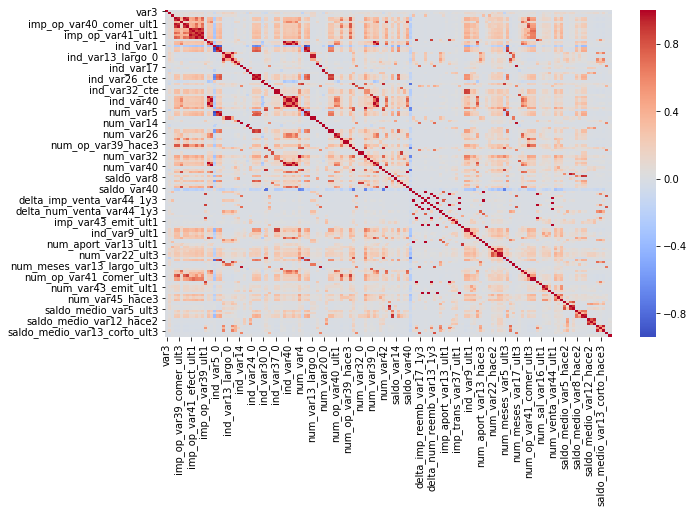

In [0]:
plt.figure(figsize=(10,6))
sns.heatmap(restricted_train147.corr(), cmap='coolwarm')
plt.show()

In [0]:
log147= LogisticRegression()
log147.fit(restricted_train147, Y_train)
pred147 = log147.predict(X_test147)
print(confusion_matrix(Y_test, pred147))

[[625 289]
 [207 684]]


In [0]:
print('train accuracy TP+TN/tot is {}'.format(accuracy_score(Y_train, log147.predict(restricted_train147))))
print('test accuracy TP+TN/tot is {}'.format(accuracy_score(Y_test, pred147)))
print()
print(classification_report(Y_test, pred147))

train accuracy TP+TN/tot is 0.7416290667299928
test accuracy TP+TN/tot is 0.725207756232687

             precision    recall  f1-score   support

          0       0.75      0.68      0.72       914
          1       0.70      0.77      0.73       891

avg / total       0.73      0.73      0.72      1805



In [0]:
val_accuracies147 = cross_val_score(estimator = log147, X = restricted_train147, y = Y_train, cv = 7)
print('validation accuracies over the K folds: ',val_accuracies147)
print('average validation accuracy over the K folds: ', val_accuracies147.mean().round(3))

validation accuracies over the K folds:  [0.72968491 0.73920266 0.72259136 0.72046589 0.70549085 0.73544093
 0.72212978]
average validation accuracy over the K folds:  0.725


In [0]:
data_restricted147= data[list(restricted_train147.columns) + ['TARGET']]
data_rest_scal= pd.DataFrame(StandardScaler().fit_transform(data_restricted147), columns= data_restricted147.columns)

In [0]:
test_accuracies147 = cross_val_score(estimator = log147, X = data_rest_scal.drop(labels=['TARGET'], axis=1), y = data_rest_scal['TARGET'], cv = 7)
print('test accuracies over the K folds: ',test_accuracies147)
print('average test accuracy over the K folds: ', test_accuracies147.mean().round(3))

test accuracies over the K folds:  [0.72325581 0.7255814  0.73255814 0.70930233 0.68139535 0.70862471
 0.76456876]
average test accuracy over the K folds:  0.721


#### NON SONO IN OVERFITTING: NEL TRAINING HO 74% ACCURATEZZA, NEL TEST 72%. Grid Search per best Lasso (più abbasso C, più penalizzo e riduco num variabili)

## Prova manuale di Best Model Selection with Lasso con GridSearch

In [0]:
parameters = {
    'C': list(np.linspace(0.002, 0.4, 2))
}                   #'balanced_accuracy_score'

Grid_logistic_lasso = GridSearchCV(LogisticRegression(penalty='l1'), param_grid=parameters, scoring= 'roc_auc', cv=7)
Grid_logistic_lasso.fit(scaled_train, Y_train) #così fa cross validation sul training, test lo sto lasciando fuori

GridSearchCV(cv=7, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1, param_grid={'C': [0.002, 0.4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [0]:
def summary_grid(grid_fit):
    """ AFTER A GRIDSEARCH, I CONSIDER RELEVANT ANALYZING THE FOLLOWING SCORES """
    print('best score: ', grid_fit.best_score_)   #data combinazione parametri, è accuratezza media valutata sulle K cross validation. quindi è sempre una validation accuracy
    print('best param combination: ', grid_fit.best_params_)   #'C': 0.357
    #print('best estimator: ', grid_fit.best_estimator_)
    #print('predictions', grid_fit.predict(scaled_test))
    
    #posso predire scaled_test, quello con tutte le 369 feauters: lui da solo ne toglierà alcune con lasso, è gia incorporato
    print('train accuracy TP+TN/tot is {}'.format(accuracy_score(Y_train, grid_fit.predict(scaled_train))))
    print('test accuracy TP+TN/tot is {}'.format(accuracy_score(Y_test, grid_fit.predict(scaled_test))))
    print("cross validation accuracy sul train è: ", cross_val_score(estimator = grid_fit.best_estimator_, X = scaled_train, y = Y_train, cv = 10).mean())
    print(classification_report(Y_test, grid_fit.best_estimator_.predict(scaled_test)))
    print(confusion_matrix(Y_test, grid_fit.best_estimator_.predict(scaled_test)))
    """ROC CURVE SCORES"""
    print('roc curve train is {a}, roc test is {b}'.format(a= roc_auc_score(Y_train, grid_fit.predict(scaled_train)), b= roc_auc_score(Y_test, grid_fit.predict(scaled_test))))
    print('F1 SCORE train is {a}, F1 SCORE test is {b}'.format(a= f1_score(Y_train, grid_fit.predict(scaled_train)), b= f1_score(Y_test, grid_fit.predict(scaled_test))))

In [0]:
summary_grid(Grid_logistic_lasso)

best score:  0.7985625112344996
best param combination:  {'C': 0.4}
train accuracy TP+TN/tot is 0.7380669674661601
test accuracy TP+TN/tot is 0.7224376731301939
cross validation accuracy sul train è:  0.7264267943784104
             precision    recall  f1-score   support

          0       0.74      0.70      0.72       914
          1       0.71      0.75      0.73       891

avg / total       0.72      0.72      0.72      1805

[[637 277]
 [224 667]]
roc curve train is 0.7378866401473675, roc test is 0.7227668122999998
F1 SCORE train is 0.7474238607739867, F1 SCORE test is 0.7269754768392371


## Ogni Grid Search è frutto di varie iterazioni che per ordine e lunghezza del notebook non riporto. 
## Ad ogni iterazione restringo il range di valori della griglia intorno al vincente dell'iterazione precedente <br> 
 **Una generica iterazione per trovare miglior parametro C è:**
1. C= [0.1, 1, 10, 100] --> vincente C=1
2. C= [0.6, 0.8, 1, 1.2, 1.4] --> vincente C= 1.4
3. C= [1.3, 1.4, 1.5] ecc

### Da cella sotto risulta che migliore C è tra 0.054 (best accuracy) e 0.0723 (best AUC)

# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'C': 0.2160689655172414}

Grid scores on development set:

Mean test accuracy, std_ dev and params combination:
0.683 , (+/-0.016) for {'C': 0.004}
0.702 , (+/-0.018) for {'C': 0.012482758620689656}
0.712 , (+/-0.019) for {'C': 0.020965517241379312}
0.716 , (+/-0.019) for {'C': 0.029448275862068968}
0.720 , (+/-0.013) for {'C': 0.03793103448275863}
0.721 , (+/-0.015) for {'C': 0.046413793103448286}
0.722 , (+/-0.018) for {'C': 0.05489655172413793}
0.723 , (+/-0.019) for {'C': 0.06337931034482759}
0.723 , (+/-0.022) for {'C': 0.07186206896551725}
0.724 , (+/-0.020) for {'C': 0.08034482758620691}
0.725 , (+/-0.020) for {'C': 0.08882758620689657}
0.725 , (+/-0.020) for {'C': 0.09731034482758621}
0.725 , (+/-0.018) for {'C': 0.10579310344827587}
0.724 , (+/-0.020) for {'C': 0.11427586206896553}
0.725 , (+/-0.020) for {'C': 0.12275862068965518}
0.724 , (+/-0.020) for {'C': 0.13124137931034485}
0.724 , (+

C:\Users\feder\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)



{'C': 0.05489655172413793}

Grid scores on development set:

Mean test accuracy, std_ dev and params combination:
0.716 , (+/-0.018) for {'C': 0.004}
0.721 , (+/-0.014) for {'C': 0.012482758620689656}
0.722 , (+/-0.018) for {'C': 0.020965517241379312}
0.724 , (+/-0.015) for {'C': 0.029448275862068968}
0.724 , (+/-0.015) for {'C': 0.03793103448275863}
0.724 , (+/-0.015) for {'C': 0.046413793103448286}
0.725 , (+/-0.014) for {'C': 0.05489655172413793}
0.725 , (+/-0.014) for {'C': 0.06337931034482759}
0.725 , (+/-0.013) for {'C': 0.07186206896551725}
0.723 , (+/-0.013) for {'C': 0.08034482758620691}
0.722 , (+/-0.012) for {'C': 0.08882758620689657}
0.723 , (+/-0.012) for {'C': 0.09731034482758621}
0.722 , (+/-0.012) for {'C': 0.10579310344827587}
0.722 , (+/-0.012) for {'C': 0.11427586206896553}
0.723 , (+/-0.012) for {'C': 0.12275862068965518}
0.723 , (+/-0.012) for {'C': 0.13124137931034485}
0.722 , (+/-0.012) for {'C': 0.1397241379310345}
0.723 , (+/-0.012) for {'C': 0.148206896551724

C:\Users\feder\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


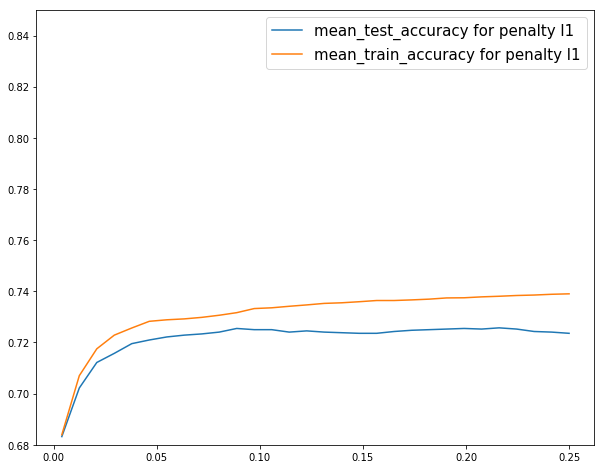

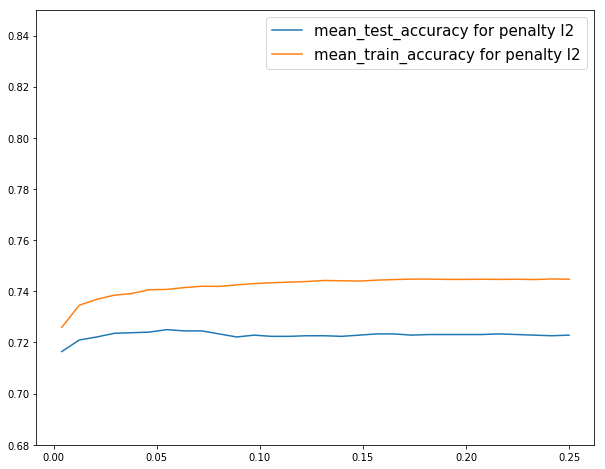

# Tuning hyper-parameters for roc_auc

Best parameters set found on development set:

{'C': 0.07186206896551725}

Grid scores on development set:

Mean test accuracy, std_ dev and params combination:
0.769 , (+/-0.017) for {'C': 0.004}
0.788 , (+/-0.018) for {'C': 0.012482758620689656}
0.796 , (+/-0.017) for {'C': 0.020965517241379312}
0.799 , (+/-0.017) for {'C': 0.029448275862068968}
0.800 , (+/-0.018) for {'C': 0.03793103448275863}
0.801 , (+/-0.018) for {'C': 0.046413793103448286}
0.801 , (+/-0.019) for {'C': 0.05489655172413793}
0.801 , (+/-0.019) for {'C': 0.06337931034482759}
0.801 , (+/-0.019) for {'C': 0.07186206896551725}
0.801 , (+/-0.019) for {'C': 0.08034482758620691}
0.801 , (+/-0.019) for {'C': 0.08882758620689657}
0.801 , (+/-0.019) for {'C': 0.09731034482758621}
0.800 , (+/-0.020) for {'C': 0.10579310344827587}
0.800 , (+/-0.020) for {'C': 0.11427586206896553}
0.800 , (+/-0.021) for {'C': 0.12275862068965518}
0.800 , (+/-0.021) for {'C': 0.13124137931034485}
0.799 , (+

C:\Users\feder\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)



{'C': 0.012482758620689656}

Grid scores on development set:

Mean test accuracy, std_ dev and params combination:
0.798 , (+/-0.019) for {'C': 0.004}
0.799 , (+/-0.022) for {'C': 0.012482758620689656}
0.798 , (+/-0.024) for {'C': 0.020965517241379312}
0.798 , (+/-0.024) for {'C': 0.029448275862068968}
0.797 , (+/-0.024) for {'C': 0.03793103448275863}
0.797 , (+/-0.024) for {'C': 0.046413793103448286}
0.797 , (+/-0.024) for {'C': 0.05489655172413793}
0.796 , (+/-0.023) for {'C': 0.06337931034482759}
0.796 , (+/-0.023) for {'C': 0.07186206896551725}
0.796 , (+/-0.023) for {'C': 0.08034482758620691}
0.795 , (+/-0.023) for {'C': 0.08882758620689657}
0.795 , (+/-0.023) for {'C': 0.09731034482758621}
0.795 , (+/-0.023) for {'C': 0.10579310344827587}
0.795 , (+/-0.022) for {'C': 0.11427586206896553}
0.795 , (+/-0.022) for {'C': 0.12275862068965518}
0.795 , (+/-0.022) for {'C': 0.13124137931034485}
0.794 , (+/-0.022) for {'C': 0.1397241379310345}
0.794 , (+/-0.022) for {'C': 0.14820689655172

C:\Users\feder\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


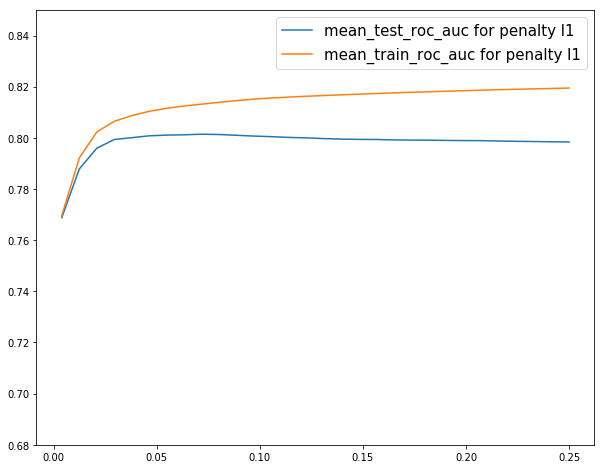

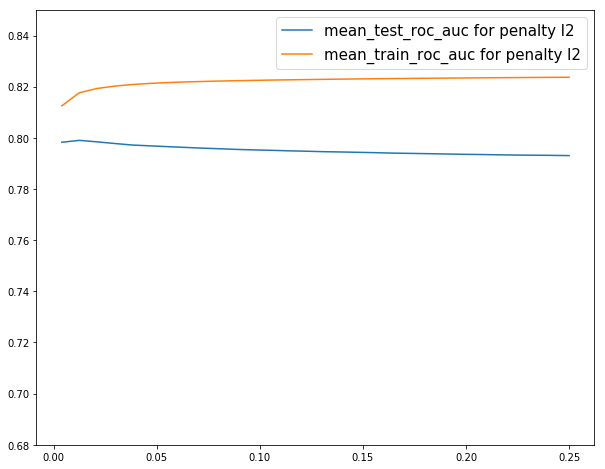

In [0]:
#'C': 0.143 for accuracy metric, 'C': 0.0723 for roc_auc

scores= ['accuracy', 'roc_auc']
#scores = ['precision', 'recall']
parameters = {
    'C': list(np.linspace(0.004, 0.25, 30))
    #'penalty': ['l1', 'l2']    #l1 è lasso, l2 è ridge
} 

penalty=['l1', 'l2']  #l1 è lasso, l2 è ridge

# Per Subplots invece di plot singoli:
#quadrante=1
#.figure(figsize=(10,8))
for score in scores:
    for pen in penalty:
        print("# Tuning hyper-parameters for %s" % score)
        print()
        clf = GridSearchCV(LogisticRegression(penalty= pen), param_grid=parameters, scoring= score, cv=5)

        print("Best parameters set found on development set:")
        clf.fit(scaled_train, Y_train)
        print()
        print(clf.best_params_)
        print()
        print("Grid scores on development set:")
        print()
        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']
        print('Mean test accuracy, std_ dev and params combination:')
        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f , (+/-%0.03f) for %r"
                  % (mean, std * 2, params))   #mean_test_accuracy, std_dev
        print()

        print("Detailed classification report:")
        print()
        print("The model is trained on the full development set.")
        print("The scores are computed on the full evaluation set.")
        print()
        y_true, y_pred = Y_test, clf.predict(scaled_test)
        print(classification_report(y_true, y_pred))
        print()

        plt.figure(figsize=(10,8))
        #plt.subplot(2,2, quadrante)
        plt.ylim([0.68,0.85])
        plt.plot(parameters['C'], clf.cv_results_['mean_test_score'], label='mean_test_{} for penalty {}'.format(score,pen) )
        plt.plot(parameters['C'], clf.cv_results_['mean_train_score'], label='mean_train_{} for penalty {}'.format(score,pen))
        plt.legend(loc = 'upper right', fontsize= 15)
        quadrante+=1
    plt.show()

In [0]:
domain = np.linspace(0.004, 0.25, 30)  #range frutto di tante prove

param_grid = [{'classifier__C': domain, 'classifier__penalty': ['l1','l2']}]
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}

p = Pipeline([('scaler', StandardScaler()),('classifier', LogisticRegression())])

clf_lr = GridSearchCV(p, param_grid, cv=5, scoring=scoring, refit='AUC', return_train_score=True)
clf_lr = clf.fit(X_train,Y_train)
results = clf.cv_results_
df_results = pd.DataFrame(results)

In [0]:
clf_lr.best_params_  #'classifier__C': 0.05489655172413793, 'classifier__penalty': 'l1'

{'classifier__C': 0.05489655172413793, 'classifier__penalty': 'l1'}

best param 0.05489655172413793
best param 0.08034482758620691


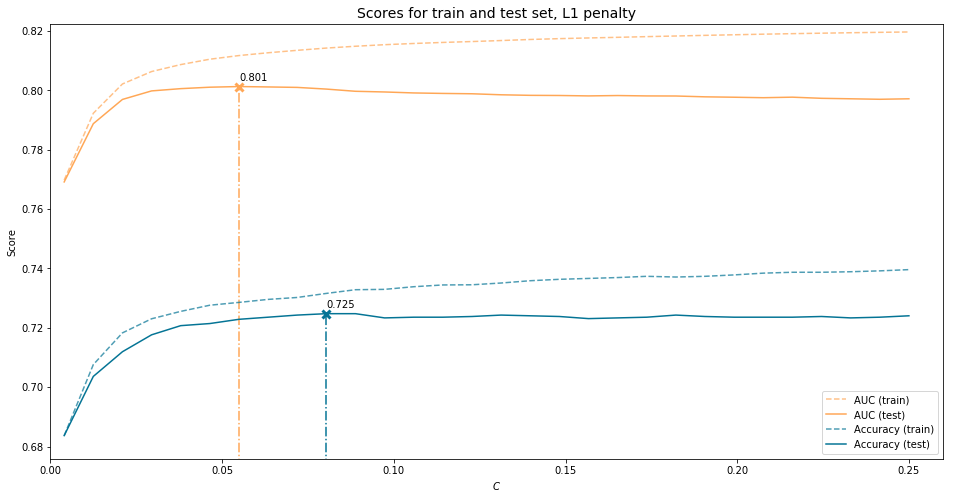

In [0]:
plt.figure(figsize=(16, 8))
dd = df_results[df_results.param_classifier__penalty=='l1']
X_axis = np.array(dd['param_classifier__C'])

mn = 10000
mx = 0
for scorer, color in zip(sorted(scoring), [colors[0], colors[1]]):
    for sample, style in (('train', '--'), ('test', '-')):
        mean = dd['mean_%s_%s' % (sample, scorer)]
        std = dd['std_%s_%s' % (sample, scorer)]
        #plt.fill_between(X_axis, mean-std, mean+std,alpha=0.3 if sample == 'test' else 0, color=color)
        plt.plot(X_axis, mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))
        mn = min(mn, min(mean-std))
        mx = max(mx, max(mean+std))
    scores = np.array(dd['mean_test_%s'% scorer])
    best_index = scores.argmax()
    best_score = scores[best_index]
    print('best param', X_axis[best_index])
    plt.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    plt.annotate("%0.3f" % best_score, (X_axis[best_index], best_score + 0.002))

    
plt.xlabel("$C$")
plt.ylabel("Score")

plt.xlim(0, 0.26)
plt.ylim(mn, mx)
plt.legend()
plt.title("Scores for train and test set, L1 penalty", fontsize=14)
plt.show()

In [0]:
"""NOW I FIND THE BEST PROBABILITY TRESHOLD TO SEPARATE CLASSES"""

fpr, tpr, thresholds = roc_curve(Y_test, clf.predict_proba(scaled_test)[:,1], pos_label=1)
optimal_idx = np.argmax(tpr-fpr)
optimal_threshold = thresholds[optimal_idx]
pred_proba_df = pd.DataFrame(clf.predict_proba(X)[:,1])
p = pred_proba_df.applymap(lambda x: 1 if x>optimal_threshold else 0)
print('Optimal threshold: {0:3.3f}'.format(optimal_threshold))

Optimal threshold: 0.026


### In teoria usando questa nuova treshold mi dovrebbe migliorare predizione..non l'ho controllato!

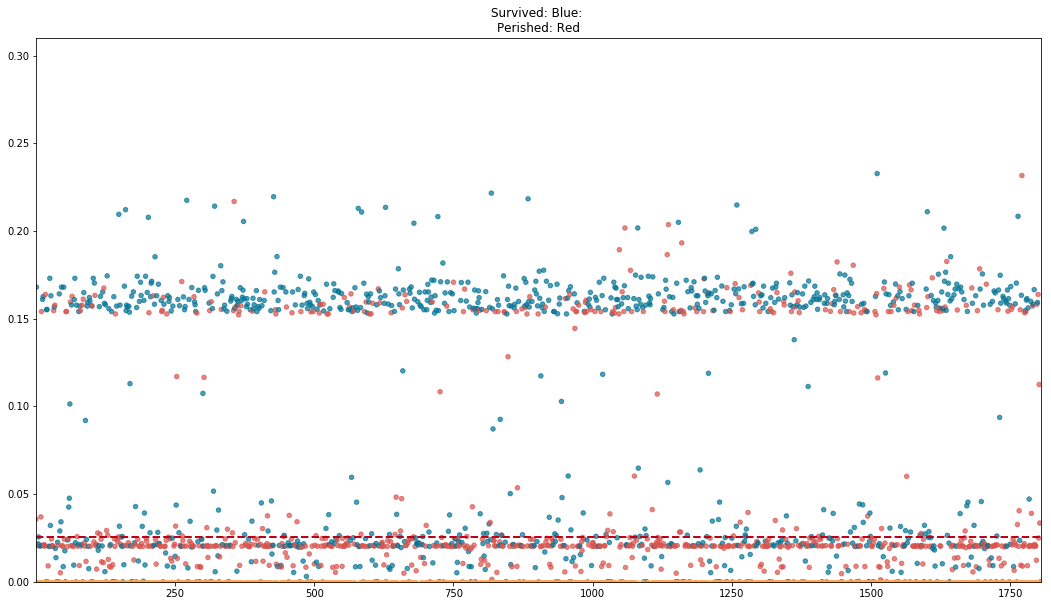

In [0]:
# Plot Predictions Vs Actual
y_prob = clf.predict_proba(scaled_test)
c = list(Y_test.apply(lambda x: colors[1] if x==1 else colors[2]))
plt.figure(figsize=(18,10))
plt.scatter(range(y_prob.shape[0]), y_prob[:,1], color=c, s = 20, marker='o', alpha=.7) #y_prob[:,1] è P(x in classe 1)
plt.plot(range(y_prob.shape[0]), Y_test, color=colors[0], ms = 4, marker='o', linestyle=' ', alpha=.7)
plt.axhline(y=optimal_threshold, xmin=0, xmax=1, linewidth=2, linestyle='dashed', color=colors[9])
plt.xlim(1,y_prob.shape[0])
plt.title('class 1: Blue: \nClass 0: Red');
plt.ylim(0,0.31)
plt.show()

# Random Forest

In teoria non ci sarebbe bisogno di standardizzare le features nè per Logistic nè per Random Forest, ma facendolo sicuramente si alleggerisce il peso computazionale, e comunque male non fa. <br>
Qui di seguito una prova per avere un'idea sulle performance con dati non standardizzati

In [0]:
rf_xtrain, rf_xtest, rf_ytrain, rf_ytest = train_test_split(data.drop(labels=['TARGET'], axis=1), data['TARGET'],test_size=0.25)

In [0]:
rf_prova= RandomForestClassifier(n_estimators= 500)
rf_prova.fit(rf_xtrain, rf_ytrain)
preds= rf_prova.predict(rf_xtest)

In [0]:
f1_score(rf_ytest, preds), f1_score(rf_ytrain, rf_prova.predict(rf_xtrain))

(0.7244367417677642, 0.9890417346700863)

Ora Random Forest utilizzando dati standardizzati e parameter tuning con GridSearch
- qui massimizzando rispetto all'accuracy.

In [0]:
rf = RandomForestClassifier(random_state=0, class_weight='balanced', max_features= "sqrt")
parameters = {
    #"criterion": ['gini', 'entropy'],
    "criterion": ['gini'],
    "n_estimators" : [100, 300, 500],    #"n_estimators" : [280, 300, 320],
    "min_impurity_decrease" :  [1e-07, 1e-08,],
    "min_samples_leaf": [5, 7, 10]
}

"""EVOLUZIONE DELLE GRIDSEARCH PER RANDOM FOREST"""
#alla prima era {'min_impurity_decrease': 0.001, 'min_samples_leaf': 25, 'n_estimators': 100}
# accuratezza test 72.6
# alla seconda è {'min_impurity_decrease': 0.0001, 'min_samples_leaf': 20, 'n_estimators': 160}
# alla terza è: 'min_impurity_decrease': 1e-05, 'min_samples_leaf': 5, 'n_estimators': 230
# alla quarta {'min_impurity_decrease': 1e-06, 'min_samples_leaf': 3, 'n_estimators': 300} ma acc training aumentata e acc 
# test diminuita, sto andando in overfitting. AUC= 0,82.


#"max_features": sqrt di Default, ovvero ad ogni split prende random n features pari alla radice del numero di features
#"min_samples_split": range(4,10)

Grid_RF = GridSearchCV(rf, parameters, scoring='accuracy', cv=7)
Grid_RF.fit(scaled_train, Y_train)

GridSearchCV(cv=7, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='sqrt',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini'], 'n_estimators': [100, 300, 500], 'min_impurity_decrease': [1e-07, 1e-08], 'min_samples_leaf': [5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [0]:
summary_grid(Grid_RF)

best score:  0.7311802422227499
best param combination:  {'criterion': 'gini', 'min_impurity_decrease': 1e-08, 'min_samples_leaf': 5, 'n_estimators': 500}
train accuracy TP+TN/tot is 0.8059843267632392
test accuracy TP+TN/tot is 0.746814404432133
cross validation accuracy sul train è:  0.7335436765693658
             precision    recall  f1-score   support

          0       0.76      0.73      0.74       914
          1       0.73      0.77      0.75       891

avg / total       0.75      0.75      0.75      1805

[[665 249]
 [208 683]]
roc curve train is 0.8058553150712001, roc test is 0.7470627745974208
F1 SCORE train is 0.8112728112728113, F1 SCORE test is 0.7493143170597916


Adesso ottimizzandola rispetto alla ROC curve, piuttosto che all'accuracy. Così si ha una perfomance più globale

In [0]:
Grid_RF_auc = GridSearchCV(rf, parameters, scoring='roc_auc', cv=7)
Grid_RF_auc.fit(scaled_train, Y_train)

GridSearchCV(cv=7, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='sqrt',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'n_estimators': [100, 500, 1000], 'min_impurity_decrease': [1e-07, 1e-08], 'min_samples_leaf': [5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [0]:
print('best mean accuracy', Grid_RF.best_score_)
print('best parameters combination:' ,Grid_RF.best_params_)

print('best AUC', Grid_RF_auc.best_score_)
print('best AUC parameters combination:' , Grid_RF_auc.best_params_)

best mean accuracy 0.7337924483495607
best parameters combination: {'criterion': 'entropy', 'min_impurity_decrease': 1e-07, 'min_samples_leaf': 5, 'n_estimators': 1000}
best AUC 0.8194663544407794
best AUC parameters combination: {'criterion': 'entropy', 'min_impurity_decrease': 1e-08, 'min_samples_leaf': 5, 'n_estimators': 500}


**GridSearch Finale per Random Forest ottimizzata sulla base delle varie iterazioni precedenti**

In [0]:
param_grid = [{'n_estimators':[1000, 2500, 4000],
#                'criterion':["gini","entropy"],
               "min_impurity_decrease" :  [1e-07, 1e-08,],
                "min_samples_leaf": [5, 12, 20 ]
              'min_samples_split':np.arange(2,100,50)}]
rf = RandomForestClassifier(criterion='gini', n_jobs=-1)
grid_search_rf=GridSearchCV(rf,param_grid,cv=7,scoring='roc_auc',return_train_score=True)
grid_search_rf.fit(scaled_train, Y_train)

In [0]:
summary_grid(grid_search_rf)

best score:  0.8287192835041349
best param combination:  {'min_samples_split': 52, 'n_estimators': 3500}
train accuracy TP+TN/tot is 0.8218950368083591
test accuracy TP+TN/tot is 0.7645429362880887
cross validation accuracy sul train è:  0.7556334634359197
             precision    recall  f1-score   support

          0       0.76      0.78      0.77       914
          1       0.77      0.75      0.76       891

avg / total       0.76      0.76      0.76      1805

[[716 198]
 [227 664]]
roc curve train is 0.8219493895553303, roc test is 0.7642999408134346
F1 SCORE train is 0.820916905444126, F1 SCORE test is 0.7575584711922418


In [0]:
print('train auc is {}'.format(accuracy_score(Y_train, Grid_RF_auc.predict(scaled_train))))
print('test auc is {}'.format(accuracy_score(Y_test, Grid_RF_auc.predict(scaled_test))))

train accuracy TP+TN/tot is 0.8076466397530278
test accuracy TP+TN/tot is 0.7423822714681441
             precision    recall  f1-score   support

          0       0.75      0.73      0.74       914
          1       0.73      0.76      0.74       891

avg / total       0.74      0.74      0.74      1805

[[667 247]
 [218 673]]
train auc is 0.8062218000474947
test auc is 0.7440443213296399


# K-Nearest-Neighbours (KNN)

In [0]:
knn = KNeighborsClassifier()
parameters = {
    'n_neighbors': [16, 18, 20, 22, 24],
    'weights': ['uniform','distance'],
    'p':[1,2]
}

Grid_KNN = GridSearchCV(knn, parameters, scoring='accuracy', n_jobs=-1)
Grid_KNN.fit(scaled_train, Y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [16, 18, 20, 22, 24], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [0]:
summary_grid(Grid_KNN)

best score:  0.7174067917359297
best param combination:  {'n_neighbors': 16, 'weights': 'uniform'}
predictions [0 1 0 ... 1 1 0]
train accuracy TP+TN/tot is 0.7508905248159582
test accuracy TP+TN/tot is 0.7340720221606648
cross validation accuracy sul train è:  0.7214329966319137
             precision    recall  f1-score   support

          0       0.71      0.80      0.75       914
          1       0.77      0.66      0.71       891

avg / total       0.74      0.73      0.73      1805

[[733 181]
 [299 592]]
roc curve train is 0.7512242279378425, roc test is 0.7331956815910136


In [0]:
"""Random Grid Search rather than classical GridSearch"""

parameters = {
    'n_neighbors': [16, 18, 20, 22, 24],
    'weights': ['uniform','distance']
                          }
Random_Grid_KNN = RandomizedSearchCV(knn, parameters, scoring='accuracy', n_jobs=-1)
Random_Grid_KNN.fit(scaled_train, Y_train)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'n_neighbors': [16, 18, 20, 22, 24], 'weights': ['uniform', 'distance']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=0)

In [0]:
#summary_grid(Random_Grid_KNN)   #stesse della GridSearch, perchè spesso RandomGridSearch e quella classica coincidono

# SVD and PCA 
### Provo ad utilizzare dimensionality reduction per 2 motivi:
1. come *conferma* che non sia l'idea ottimale per la task assegnata, dato che perdo parecchia informazione
2. Per poter visualizzare i plot in 2D e 3D e farmi un idea della disposizione delle osservazioni nello spazio ridotto

In [41]:
X_norm = preprocessing.normalize(X)

Dimensionality reduction using truncated SVD (aka LSA).

In [42]:
X_pca = decomposition.TruncatedSVD(n_components=3).fit_transform(X_norm[:])

In [43]:
X_pca[:10]

array([[ 0.99979814, -0.01759326, -0.00227106],
       [ 0.99988828, -0.01288089, -0.00283377],
       [ 0.99986097, -0.01530798, -0.00252636],
       [ 0.99979811, -0.01759327, -0.00227106],
       [ 0.99979917, -0.01755849, -0.00227283],
       [ 0.17636721,  0.37584757,  0.35130882],
       [ 0.99874114,  0.0102287 , -0.00419779],
       [ 0.68665371,  0.5673281 , -0.27533064],
       [ 0.99753311, -0.01201302, -0.00335655],
       [ 0.99982685, -0.01655987, -0.00233105]])

<b>tr</b> will be the A 1-D array from <b>t</b>. 

In [44]:
tr=t[:].ravel()

### Visualizing Data in 2D

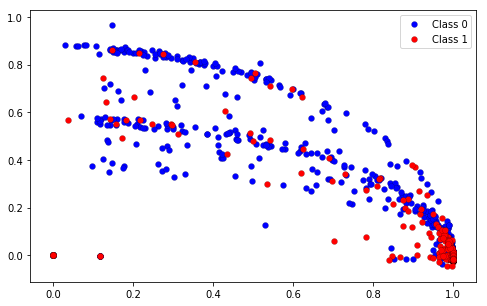

In [45]:
fig = plt.figure(figsize=(8, 5))
plt.scatter(X_pca[tr==0, 0], X_pca[tr==0, 1], label="Class 0", edgecolor='black', facecolor='blue', linewidth=0.15)
plt.scatter(X_pca[tr==1, 0], X_pca[tr==1, 1], label="Class 1", edgecolor='black', facecolor='red', linewidth=0.15)
plt.legend()
plt.show()

### VISUALIZING DATA IN 3D

In [51]:
#PER POTER RUOTARE IL GRAFICO DEVO RUNNARE QUESTA CELLA
"""from matplotlib import interactive  
%matplotlib qt"""

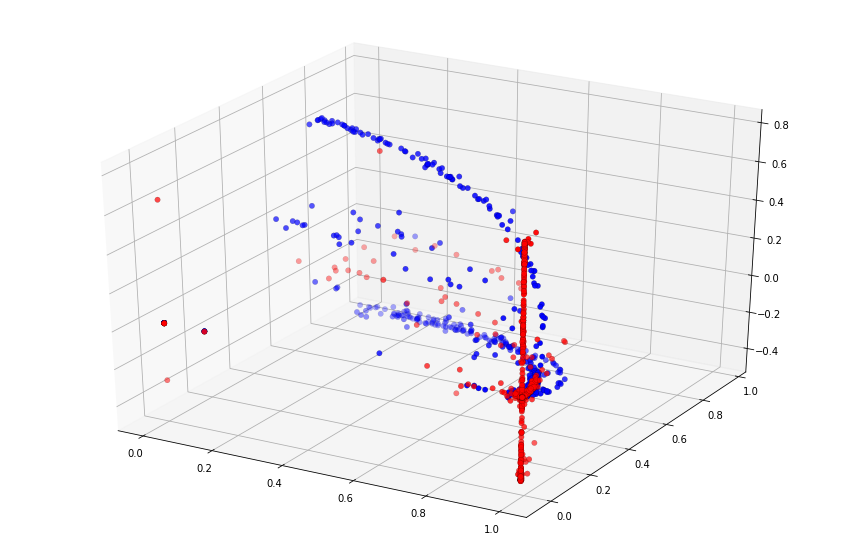

In [53]:
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
ax.scatter3D(X_pca[tr==0, 0], X_pca[tr==0, 1], X_pca[tr==0, 2], label="Class 0", edgecolor='black', facecolor='blue', linewidth=0.15, s=30)
ax.scatter3D(X_pca[tr==1, 0], X_pca[tr==1, 1], X_pca[tr==0, 2], label="Class 1", edgecolor='black', facecolor='red', linewidth=0.15, s=30)

#### Get the optimal number of components, cioè quelle che spiegano almeno una % di varianza desiderata. Esempio: con 39 componenti spiego 85% variabilità originale

In [0]:
def _get_number_components(model, threshold):
    component_variance = model.explained_variance_ratio_
    explained_variance = 0.0
    components = 0

    for var in component_variance:
        explained_variance += var
        components += 1
        if(explained_variance >= threshold):
            break
    return components

### Get the optimal number of components, cioè quelle che spiegano almeno %varianza= treshold. Con 39 componenti spiego 85% varianza
pca = PCA()   #oppure per gestire meglio sparsity potrei usare svd = decomposition.TruncatedSVD(), ma molto simili
X_scaled= StandardScaler().fit_transform(X)
X_pca = pca.fit_transform(X_scaled)
components = _get_number_components(pca, threshold=0.85)
components

39

In [0]:
pca = PCA(n_components=scaled_train.shape[1])
pca = pca.fit(X_scaled)

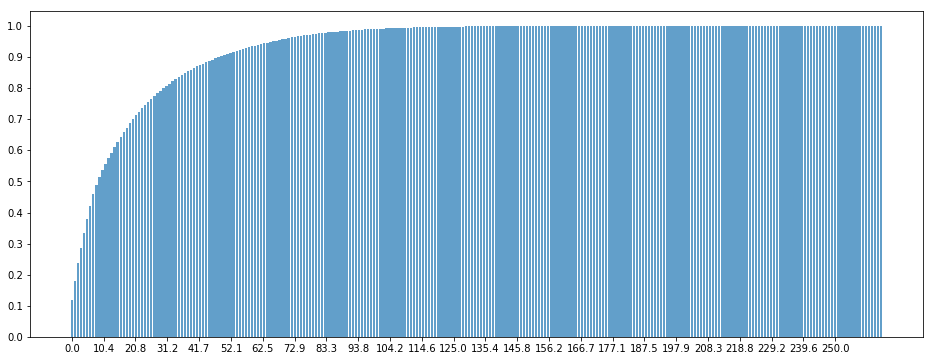

In [0]:
evr = pca.explained_variance_ratio_
fig = plt.figure(figsize=(16,6))
plt.bar(range(evr.shape[0]), evr.cumsum(), alpha=.7)
plt.xticks(range(evr.shape[0]))
plt.xticks(np.linspace(0,250,25))
plt.yticks(np.linspace(0,1,11))
plt.show()

- Grafico ACCURACY E ROC al variare di numero di componenti scelte

#### Prendo le 48 componenti tale che la varianza spiegata di ognuna sia maggiore di 1 (prendere quelle con varianza minore di 1 ha poco senso)

In [0]:
X_pca = PCA(n_components=48).fit(X_scaled)    #fit_transform(scaled_train)
variance = X_pca.explained_variance_ratio_ #calculate variance ratios
var=np.cumsum(np.round(variance, decimals=3)*100)
var #cumulative sum of variance explained with [n] features
len(X_pca.explained_variance_[X_pca.explained_variance_>=1])

48

Cumulative Variance explained by the first 46 components is:  89.70000000000003


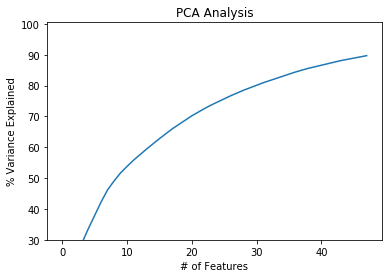

In [0]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')

print('Cumulative Variance explained by the first 46 components is: ', var[-1])

plt.plot(var)

### Provo logistic e Random Forest su PCA

In [0]:
reduced_data= pd.DataFrame(X_pca.transform(X_scaled))
reduced_data.head(2)

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,-2.432000,-1.157147,0.780181,0.606827,0.615301,-0.293519,0.413746,-0.621338,0.090971,-1.244155,...,0.047069,-0.086601,-0.025085,0.027421,-0.056754,0.022037,-0.014285,-0.031679,0.007546,0.067044
1,-0.772713,0.162088,-0.141494,-0.178014,-0.841980,0.329514,-0.224880,0.916462,-0.197557,1.888378,...,-0.231559,0.212473,-0.146350,-0.005892,-0.106483,0.292013,0.081606,-0.303197,0.332437,-0.173051


In [0]:
Xpca_train, Xpca_test, Ypca_train, Ypca_test = train_test_split(reduced_data, data['TARGET'], test_size=0.3,random_state=0)
ypca_train, ypca_test= Ypca_train, Ypca_test

In [0]:
parameters = {
    'C': list(np.linspace(0.1, 2, 15)),
    'penalty': ['l1', 'l2']    #l1 è lasso, l2 è ridge
} 

#penalty=['l1', 'l2']
scores= ['accuracy', 'roc_auc']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    clf = GridSearchCV(LogisticRegression(), param_grid=parameters, scoring= score, cv=5)

    print("Best parameters set found on development set:")
    clf.fit(Xpca_train, Ypca_train)
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    print('Mean test accuracy, std_ dev and params combination:')
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f , (+/-%0.03f) for %r"
              % (mean, std * 2, params))   #mean_test_accuracy, std_dev
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = Ypca_test, clf.predict(Xpca_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'C': 1.457142857142857, 'penalty': 'l1'}

Grid scores on development set:

Mean test accuracy, std_ dev and params combination:
0.700 , (+/-0.024) for {'C': 0.1, 'penalty': 'l1'}
0.702 , (+/-0.021) for {'C': 0.1, 'penalty': 'l2'}
0.701 , (+/-0.022) for {'C': 0.2357142857142857, 'penalty': 'l1'}
0.701 , (+/-0.017) for {'C': 0.2357142857142857, 'penalty': 'l2'}
0.701 , (+/-0.017) for {'C': 0.37142857142857144, 'penalty': 'l1'}
0.702 , (+/-0.019) for {'C': 0.37142857142857144, 'penalty': 'l2'}
0.702 , (+/-0.016) for {'C': 0.5071428571428571, 'penalty': 'l1'}
0.702 , (+/-0.021) for {'C': 0.5071428571428571, 'penalty': 'l2'}
0.703 , (+/-0.017) for {'C': 0.6428571428571428, 'penalty': 'l1'}
0.702 , (+/-0.020) for {'C': 0.6428571428571428, 'penalty': 'l2'}
0.705 , (+/-0.016) for {'C': 0.7785714285714285, 'penalty': 'l1'}
0.703 , (+/-0.020) for {'C': 0.7785714285714285, 'penalty': 'l2'}
0.705 , (+/-0.020) f

In [0]:
log_pca= LogisticRegression(C=1.18, penalty='l1')
log_pca.fit(Xpca_train, Ypca_train)
pred_pca = log_pca.predict(Xpca_test)
print(confusion_matrix(Ypca_test, pred_pca))
print()
print('train accuracy TP+TN/tot is {}'.format(accuracy_score(Ypca_train,log_pca.predict(Xpca_train) )))
print('test accuracy TP+TN/tot is {}'.format(accuracy_score(Ypca_test, pred_pca)))
print(classification_report(Ypca_test, pred_pca))

[[640 274]
 [257 634]]

train accuracy TP+TN/tot is 0.7159819520303966
test accuracy TP+TN/tot is 0.7058171745152355
             precision    recall  f1-score   support

          0       0.71      0.70      0.71       914
          1       0.70      0.71      0.70       891

avg / total       0.71      0.71      0.71      1805



In [0]:
rf_pca= RandomForestClassifier(criterion="gini", random_state=0, class_weight='balanced', min_impurity_decrease= 1e-07,
                               min_samples_leaf= 25, n_estimators= 280)
rf_pca.fit(Xpca_train, Ypca_train)
pred_rf_pca = rf_pca.predict(Xpca_test)
print(confusion_matrix(Ypca_test, pred_rf_pca))
print()
print('train accuracy TP+TN/tot is {}'.format(accuracy_score(Ypca_train,rf_pca.predict(Xpca_train) )))
print('test accuracy TP+TN/tot is {}'.format(accuracy_score(Ypca_test, pred_rf_pca)))
print(classification_report(Ypca_test, pred_rf_pca))

[[707 207]
 [256 635]]

train accuracy TP+TN/tot is 0.794110662550463
test accuracy TP+TN/tot is 0.7434903047091412
             precision    recall  f1-score   support

          0       0.73      0.77      0.75       914
          1       0.75      0.71      0.73       891

avg / total       0.74      0.74      0.74      1805



### As expected, performances using PCA has slightly decreased (about 2% less for logistic and random forest). Since with PCA we reduced the dimension from 266 to only 48 features, this small decrease is highly compensated. In a real life situation we should probably choose the model built on PCA

# SVM

- The smaller C, the less overfitting (because more penalization)
- Draw SVM boundary

In [0]:
svm = SVC()
"""param_grid = [
  {'C': [0.1, 1, 3], 'kernel': ['linear']},
  {'C': [1, 5], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}, ]""" #RBF non viene mai scelto.

#parameters = {'kernel':('linear', 'rbf','poly', 'sigmoid'), 'C':(1, 10, 100),'gamma': (0.001, 0.0001,'auto'),'shrinking':(True,False)}

param_grid = [
  {'C': [0.001, 0.005, 0.055], 'kernel': ['linear']},
    {'C': [0.01, 1, 10], 'kernel': ['poly']}]

clf_svm = GridSearchCV(svm, param_grid)

In [0]:
clf_svm.fit(X_train_scaled, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [0.001, 0.005, 0.055], 'kernel': ['linear']}, {'C': [0.01, 1, 10], 'kernel': ['poly']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
clf_svm.best_params_

{'C': 0.055, 'kernel': 'linear'}

In [0]:
summary_grid(clf_svm)

best score:  0.7064830206601758
best param combination:  {'C': 0.055, 'kernel': 'linear'}
train accuracy TP+TN/tot is 0.726668249821895
test accuracy TP+TN/tot is 0.7174515235457064
cross validation accuracy sul train è:  0.7093296527220495
             precision    recall  f1-score   support

          0       0.73      0.70      0.72       914
          1       0.71      0.73      0.72       891

avg / total       0.72      0.72      0.72      1805

[[643 271]
 [239 652]]
roc curve train is 0.7265524369738042, roc test is 0.7176315795936511
F1 SCORE train is 0.7333796618021775, F1 SCORE test is 0.7188533627342888


# Gradient Boosting

loss function= deviance. For loss ‘exponential’ gradient boosting recovers the AdaBoost algorithm.

In [0]:
parameters = {
    'n_estimators': [20, 50, 100, 150],
    "min_impurity_decrease" :  [1e-07, 1e-08],
    "min_samples_leaf": [5, 15, 30],
    'learning_rate': np.linspace(0.1, 0.35, 7) 
}

gb = GridSearchCV(GradientBoostingClassifier(random_state=0), parameters)  #it s scoring= accuracy
gb.fit(scaled_train, y_train)
#print("Learning rate: ", learning_rate)
print("Accuracy score (training): {0:.3f}".format(gb.score(scaled_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(gb.score(scaled_test, y_test)))
print()

Accuracy score (training): 0.789
Accuracy score (validation): 0.770



In [0]:
summary_grid(gb)

best score:  0.7618142958917122
best param combination:  {'learning_rate': 0.14166666666666666, 'min_impurity_decrease': 1e-07, 'min_samples_leaf': 30, 'n_estimators': 50}
predictions [0 1 0 ... 0 0 0]
train accuracy TP+TN/tot is 0.7888862502968416
test accuracy TP+TN/tot is 0.7700831024930748
cross validation accuracy sul train è:  0.7563573366440608
             precision    recall  f1-score   support

          0       0.78      0.76      0.77       914
          1       0.76      0.78      0.77       891

avg / total       0.77      0.77      0.77      1805

[[696 218]
 [197 694]]
roc curve train is 0.7888786550321025, roc test is 0.7701940386112525


# Ensemble Methods

### Now I will use a Voting Classifier, so that an observation is classified according to the majority vote of the selected models. For instance choosing Logistic, SVM and Random Forest, an istance is classified as 1 if at least two of these models classified it as 1, else 0. 
- that is hard Classification. I choose the **soft classification**, meaning that it averages the probabilities for each of the three models and assign the class basing on the resulting averaged probability
- I avoid putting logistic and SVM in the ensemble classification voting because their perfomance on this dataset is lower

In [1]:
from sklearn.ensemble import VotingClassifier

In [0]:
voting = VotingClassifier(
    estimators=[('knn', Grid_KNN),('rf', grid_search_rf),('boosting',gb), ],  #('lr', Grid_logistic_lasso)
    voting='soft')

voting.fit(scaled_train, y_train)
# for clf in (knn,lr, dtree, rf, voting):
#     clf.fit(xs_train, y_train)
#     y_pred = clf.predict(xs_test)
#     print(clf.__class__.__name__, round(100*roc_auc_score(y_test, y_pred),2),'%')

pred_ensemble = voting.predict(scaled_test)

In [0]:
cm_ens   = confusion_matrix(y_test, pred_ensemble)
acc_ens  = round(100*accuracy_score(y_test, pred_ensemble),2)
prec_ens = round(100*precision_score(y_test, pred_ensemble),2)
rec_ens  = round(100*recall_score(y_test, pred_ensemble),2)
f1_ens   = round(100*f1_score(y_test, pred_ensemble),2)
auc_ens  = round(100*roc_auc_score(y_test, pred_ensemble),2)

#The following scores are all calculated on the test set
print('Confusion Matrix: \n{} \nAccuracy: {}% \nPrecision: {}% \nRecall: {}% \nF1: {}% \nAUC: {}%'.format(cm_ens,acc_ens,prec_ens,rec_ens,f1_ens,auc_ens))
print(classification_report(y_test, pred_ensemble))

Confusion Matrix: 
[[717 197]
 [224 667]] 
Accuracy: 76.68% 
Precision: 77.2% 
Recall: 74.86% 
F1: 76.01% 
AUC: 76.65%
             precision    recall  f1-score   support

          0       0.76      0.78      0.77       914
          1       0.77      0.75      0.76       891

avg / total       0.77      0.77      0.77      1805



The overall Perfomance is not much better than Gradient Boosting. Since this voting classifier is computatioally much more expensive, it is better to directly use Gradient Boosting

## ROC curves of all the methods used

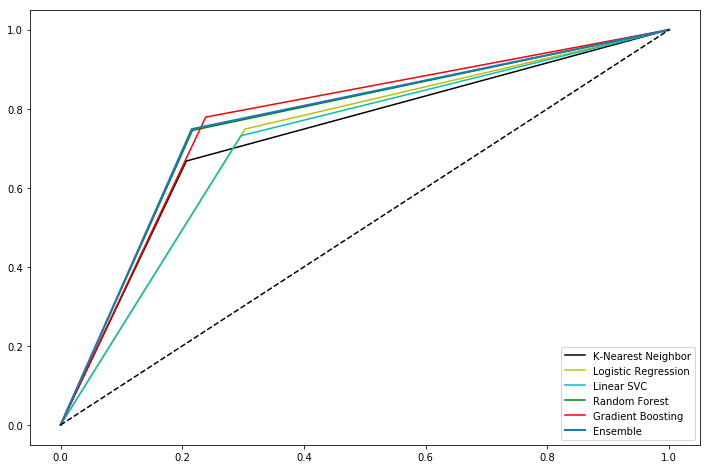

Area Under Curve 

K-Nearest Neighbor: 	73.0% 
Logistic Regression: 	72.0% 
Linear SVC: 		72.0%
Random Forest: 		76.0% 
Ensemble: 		77.0%
Gradient Boosting: 	77.0%


In [0]:
# fpr= false positive rate. tpr= true positive rate. Roc è relazione tra tpr e fpr

fpr_knn, tpr_knn, thr_knn = roc_curve(y_test, Grid_KNN.predict(scaled_test))
fpr_lr, tpr_lr, thr_lr = roc_curve(y_test, Grid_logistic_lasso.predict(scaled_test))
fpr_svc, tpr_svc, thr_svc = roc_curve(y_test, clf_svm.predict(scaled_test))
fpr_rf, tpr_rf, thr_rf = roc_curve(y_test, grid_search_rf.predict(scaled_test))
fpr_gb, tpr_gb, thr_gb = roc_curve(y_test, gb.predict(scaled_test))
fpr_ens, tpr_ens, thr_ens = roc_curve(y_test, pred_ensemble)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    [...] # Add axis labels and grid

plt.figure(figsize= (12,8))
plt.plot(fpr_knn,tpr_knn, "k", label = "K-Nearest Neighbor")
plt.plot(fpr_lr,tpr_lr, "y", label = "Logistic Regression")
plt.plot(fpr_svc,tpr_svc, "c", label = "Linear SVC")
plt.plot(fpr_rf,tpr_rf, "g", label = "Random Forest")
plt.plot(fpr_gb,tpr_gb, "r", label = "Gradient Boosting")
plot_roc_curve(fpr_ens, tpr_ens, "Ensemble")
plt.legend(loc="lower right")
plt.show()

print("\033[1mArea Under Curve \033[0m\n\nK-Nearest Neighbor: \t{}% \nLogistic Regression: \t{}% \nLinear SVC: \t\t{}%\nRandom Forest: \t\t{}% \nEnsemble: \t\t{}%\nGradient Boosting: \t{}%".format(
    100*roc_auc_score(y_test, Grid_KNN.predict(scaled_test)).round(2),
    100*roc_auc_score(y_test, Grid_logistic_lasso.predict(scaled_test)).round(2),
    100*roc_auc_score(y_test, clf_svm.predict(scaled_test)).round(2),
    100*roc_auc_score(y_test, grid_search_rf.predict(scaled_test)).round(2),
    100*roc_auc_score(y_test, pred_ensemble).round(2),
    100*roc_auc_score(y_test, gb.predict(scaled_test)).round(2)))

# NEURAL NETWORKS

In [23]:
from sklearn import datasets, linear_model
from keras import regularizers
from keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
import keras

lr= 0.001
adam= optimizers.Adam(lr= lr)

Using TensorFlow backend.


In [24]:
#create validation set 
train_setNN, val_setNN, y_trainNN, y_valNN = train_test_split(scaled_train, y_train, test_size=0.2,random_state=0)
len(train_setNN), len(train_setNN)+ len(val_setNN)== len(scaled_train)

(3609, True)

In [0]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(30, input_dim=len(X_train_scaled.columns), activation='relu'))
    model.add(Dense(10, input_dim=len(X_train_scaled.columns), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))   #anche softmax va bene, ma sigmoid dà molta più accuratezza. Penso perchè sigmoid è caso binario, softmax più classi
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  #se piu categorie metto categorical_crossentropy
    return model

In [ ]:
"""prediction = estimator.predict(validation_X)
prediction_train=estimator.predict(train_X)"""

In [25]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=10, batch_size=10, verbose=2)
history= estimator.fit(train_setNN, y_trainNN, validation_data=(val_setNN, y_valNN))  
#così è giusto, devo usare train e validation separati. Siccome ho pochi dati potrei mettere pure direttamente 
# X_train_scaled, y_train per training è X_test scaled, y_test per validation set..

"""NB: qui è giusto len(train_setNN) è 3609, infatti dice training su 3609. len(val_set_NN) è 903 e infatti è 
quello su cui si allena.

NB2: IN SEGUITO, USANDO COME TRAINING scaled_training CHE HA 4512 elementi 
e come val il test set, che ne ha 6016- 4512, mi fa il training solo su 3008, ovvero il 66,6% dei 4512, 
perche la Grid Search ha di default cv=3, quindi mi divide il training in 3 parti e ne prende 2 (66%) ad ogni botta"""


W0628 18:18:10.155143 140059264472960 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0628 18:18:10.162055 140059264472960 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0628 18:18:10.166748 140059264472960 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0628 18:18:10.209528 140059264472960 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0628 18:18:10.231691 140059264472960 deprecation_wrappe

Train on 3609 samples, validate on 903 samples
Epoch 1/10
 - 5s - loss: 0.6078 - acc: 0.6922 - val_loss: 0.5692 - val_acc: 0.7065
Epoch 2/10
 - 1s - loss: 0.5395 - acc: 0.7398 - val_loss: 0.5475 - val_acc: 0.7231
Epoch 3/10
 - 1s - loss: 0.5216 - acc: 0.7553 - val_loss: 0.5366 - val_acc: 0.7309
Epoch 4/10
 - 1s - loss: 0.5077 - acc: 0.7587 - val_loss: 0.5394 - val_acc: 0.7375
Epoch 5/10
 - 1s - loss: 0.5040 - acc: 0.7600 - val_loss: 0.5367 - val_acc: 0.7320
Epoch 6/10
 - 1s - loss: 0.4944 - acc: 0.7670 - val_loss: 0.5385 - val_acc: 0.7342
Epoch 7/10
 - 1s - loss: 0.4869 - acc: 0.7697 - val_loss: 0.5342 - val_acc: 0.7276
Epoch 8/10
 - 1s - loss: 0.4820 - acc: 0.7697 - val_loss: 0.5521 - val_acc: 0.7331
Epoch 9/10
 - 1s - loss: 0.4791 - acc: 0.7750 - val_loss: 0.5412 - val_acc: 0.7364
Epoch 10/10
 - 1s - loss: 0.4709 - acc: 0.7756 - val_loss: 0.5544 - val_acc: 0.7209


In [26]:
kfold = KFold(n_splits=5, shuffle=False)
scores=cross_validate(estimator, scaled_train, y_train, cv=kfold, return_train_score=True, scoring=['accuracy', 'roc_auc'] )
print(scores['test_accuracy'].mean()*100, scores['test_roc_auc'].mean()*100)

Epoch 1/10
 - 1s - loss: 0.6291 - acc: 0.6902
Epoch 2/10
 - 1s - loss: 0.5494 - acc: 0.7265
Epoch 3/10
 - 1s - loss: 0.5251 - acc: 0.7415
Epoch 4/10
 - 1s - loss: 0.5147 - acc: 0.7506
Epoch 5/10
 - 1s - loss: 0.5046 - acc: 0.7600
Epoch 6/10
 - 1s - loss: 0.4966 - acc: 0.7634
Epoch 7/10
 - 1s - loss: 0.4950 - acc: 0.7631
Epoch 8/10
 - 1s - loss: 0.4842 - acc: 0.7728
Epoch 9/10
 - 1s - loss: 0.4777 - acc: 0.7733
Epoch 10/10
 - 1s - loss: 0.4738 - acc: 0.7781
Epoch 1/10
 - 1s - loss: 0.6104 - acc: 0.6935
Epoch 2/10
 - 1s - loss: 0.5446 - acc: 0.7323
Epoch 3/10
 - 1s - loss: 0.5215 - acc: 0.7570
Epoch 4/10
 - 1s - loss: 0.5076 - acc: 0.7548
Epoch 5/10
 - 1s - loss: 0.5017 - acc: 0.7631
Epoch 6/10
 - 1s - loss: 0.4902 - acc: 0.7623
Epoch 7/10
 - 1s - loss: 0.4865 - acc: 0.7697
Epoch 8/10
 - 1s - loss: 0.4786 - acc: 0.7733
Epoch 9/10
 - 1s - loss: 0.4797 - acc: 0.7731
Epoch 10/10
 - 1s - loss: 0.4703 - acc: 0.7767
Epoch 1/10
 - 1s - loss: 0.6031 - acc: 0.6903
Epoch 2/10
 - 1s - loss: 0.5411 

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

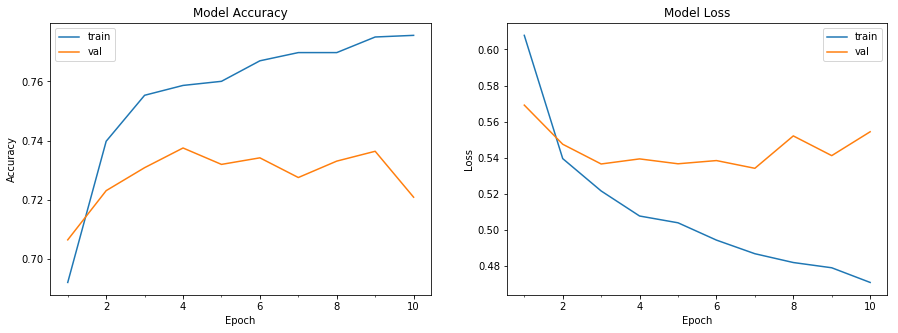

In [28]:
plot_model_history(history)

**Accuracy seems to grow fast in the first 4 epochs, then it does not improve regularly. With too many epochs we would be in overfitting**

In [29]:
print("loss function and train accuracy are: ", history.model.evaluate(train_setNN, y_trainNN))
print("loss function and validation accuracy are: ", history.model.evaluate(val_setNN, y_valNN))
print("loss function and test accuracy are: ", history.model.evaluate(scaled_test, y_test))

3609/3609 [==============================] - 0s 46us/step
loss function and train accuracy are:  [0.4767459826180069, 0.7722360762938069]
903/903 [==============================] - 0s 43us/step
loss function and validation accuracy are:  [0.5544142845857183, 0.7209302326241469]
1504/1504 [==============================] - 0s 45us/step
loss function and test accuracy are:  [0.6047350542342409, 0.7240691489361702]


**I obtained 74% of accuracy on the test set with this simple Dense Neural Network**

# GRIDSEARCH per la rete neurale (computationally super heavy, not having GPU)

In [30]:
param_grid = dict(
        epochs= [10,20],
        batch_size= [10, 20] )   

estimator = KerasClassifier(build_fn=baseline_model, verbose=2)
grid_NN = GridSearchCV(estimator=estimator, param_grid=param_grid, cv= 3)
grid_NN = grid_NN.fit(train_setNN, y_trainNN, validation_data=(val_setNN, y_valNN))

Epoch 1/10
 - 1s - loss: 0.6210 - acc: 0.6815
Epoch 2/10
 - 1s - loss: 0.5442 - acc: 0.7320
Epoch 3/10
 - 1s - loss: 0.5220 - acc: 0.7457
Epoch 4/10
 - 1s - loss: 0.5082 - acc: 0.7530
Epoch 5/10
 - 1s - loss: 0.4979 - acc: 0.7686
Epoch 6/10
 - 1s - loss: 0.4895 - acc: 0.7753
Epoch 7/10
 - 1s - loss: 0.4822 - acc: 0.7803
Epoch 8/10
 - 1s - loss: 0.4797 - acc: 0.7789
Epoch 9/10
 - 1s - loss: 0.4704 - acc: 0.7842
Epoch 10/10
 - 1s - loss: 0.4693 - acc: 0.7816
Epoch 1/10
 - 1s - loss: 0.6358 - acc: 0.6749
Epoch 2/10
 - 1s - loss: 0.5504 - acc: 0.7324
Epoch 3/10
 - 1s - loss: 0.5177 - acc: 0.7507
Epoch 4/10
 - 1s - loss: 0.5055 - acc: 0.7576
Epoch 5/10
 - 1s - loss: 0.4942 - acc: 0.7603
Epoch 6/10
 - 1s - loss: 0.4880 - acc: 0.7666
Epoch 7/10
 - 1s - loss: 0.4818 - acc: 0.7689
Epoch 8/10
 - 1s - loss: 0.4758 - acc: 0.7746
Epoch 9/10
 - 1s - loss: 0.4694 - acc: 0.7729
Epoch 10/10
 - 1s - loss: 0.4643 - acc: 0.7776
Epoch 1/10
 - 2s - loss: 0.6072 - acc: 0.6885
Epoch 2/10
 - 1s - loss: 0.5434 

KeyboardInterrupt: ignored

In [0]:
"""lr=[1e-2, 1e-3, 1e-4]
decay=[1e-6,1e-9,0]"""

def binary_classifier(nl1=1, nl2=1,  nl3=1, 
                 nn1=1000, nn2=500, nn3 = 200, lr=0.01, decay=0., l1=0.01, l2=0.01, dropout=0.2):
    # create model
    opt = keras.optimizers.Adam(lr=lr, beta_1=0.9, beta_2=0.999,  decay=decay)
    reg = keras.regularizers.l1_l2(l1=l1, l2=l2)
    
    model = Sequential()
    model.add(Dense(nn1, input_dim=len(X_train_scaled.columns), activation='relu', kernel_initializer=keras.initializers.he_normal(seed=1)))
    model.add(Dropout(dropout))
    model.add(Dense(nn2, input_dim=len(X_train_scaled.columns), activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(nn3, input_dim=len(X_train_scaled.columns), activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(1, activation='sigmoid'))   
    #anche softmax va bene, ma sigmoid dà molta più accuratezza. Penso perchè sigmoid è caso binario, softmax più classi
    # NB: Se volevo usare softmax dovevo mettere 2 layer Dense nell'output invece di 1
    
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer= opt, metrics=['accuracy'])  #se piu categorie metto categorical_crossentropy
    return model

In [0]:
estimator = KerasClassifier(build_fn=binary_classifier, verbose=2)

In [39]:
param_grid = dict(
        epochs= [15,20,30,40],
        batch_size= [30, 40, 50, 60] ) 

grid_NN = RandomizedSearchCV(estimator=estimator, param_distributions=param_grid ) 
grid_NN = grid_NN.fit(scaled_train, y_train, validation_data=(scaled_test, y_test))  #cosi --> scaled_train, y_train, validation_data=(val_setNN, y_valNN) sbagliato, perche validation sarebbe incluso nel training. Andrei bene su validation ma non veritiero

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Train on 3008 samples, validate on 903 samples
Epoch 1/15
3008/3008 [==============================] - 5s 2ms/step - loss: 40.0943 - acc: 0.4960 - val_loss: 13.3527 - val_acc: 0.4950
Epoch 2/15
3008/3008 [==============================] - 0s 125us/step - loss: 12.2520 - acc: 0.4997 - val_loss: 11.2255 - val_acc: 0.4950
Epoch 3/15
3008/3008 [==============================] - 0s 125us/step - loss: 11.8806 - acc: 0.4977 - val_loss: 11.8980 - val_acc: 0.4950
Epoch 4/15
3008/3008 [==============================] - 0s 123us/step - loss: 11.9358 - acc: 0.5066 - val_loss: 12.4889 - val_acc: 0.4950
Epoch 5/15
3008/3008 [==============================] - 0s 120us/step - loss: 12.0399 - acc: 0.5030 - val_loss: 12.1495 - val_acc: 0.4950
Epoch 6/15
3008/3008 [==============================] - 0s 126us/step - loss: 12.0569 - acc: 0.5090 - val_loss: 12.1188 - val_acc: 0.4950
Epoch 7/15
3008/3008 [==============================] - 0s 119us/step - loss: 12.0570 - acc: 0.5050 - val_loss: 12.0394 - val_a

In [47]:
"""check_point = ModelCheckpoint(file_path, monitor="val_acc", verbose=1, save_best_only=True, mode="max")
early_stop = EarlyStopping(monitor="val_acc", mode="max", patience=5)"""

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f615927b198>,
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'batch_size': [10, 20, 30, 50, 80],
                                        'epochs': [10, 20]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [0]:
def summary_grid_NN(grid_fit):
    print('best score on validation: ', grid_fit.best_score_)   #data combinazione parametri, è accuratezza media valutata sulle K cross validation. quindi è sempre una validation accuracy
    print('best param combination: ', grid_fit.best_params_)   #'C': 0.357
    print('predictions', grid_fit.predict(scaled_test))
    #posso predire scaled_test, quello con tutte le 369 feauters: lui da solo ne toglierà alcune con lasso, è gia incorporato
    print('train accuracy TP+TN/tot is {}'.format(accuracy_score(Y_train, grid_fit.predict(scaled_train))))
    print('test accuracy TP+TN/tot is {}'.format(accuracy_score(Y_test, grid_fit.predict(scaled_test))))
    #print("cross validation accuracy sul train è: ", cross_val_score(estimator = grid_fit, X = scaled_train, y = Y_train, cv = 5, verbose=0).mean())
    print(classification_report(Y_test, grid_fit.best_estimator_.predict(scaled_test)))
    print(confusion_matrix(Y_test, grid_fit.predict(scaled_test)))
    """ROC CURVE SCORES"""
    print('roc curve train is {a}, roc test is {b}'.format(a= roc_auc_score(Y_train, grid_fit.predict(scaled_train)), b= roc_auc_score(Y_test, grid_fit.predict(scaled_test))))
    print('F1 SCORE train is {a}, F1 SCORE test is {b}'.format(a= f1_score(Y_train, grid_fit.predict(scaled_train)), b= f1_score(Y_test, grid_fit.predict(scaled_test))))

In [40]:
summary_grid_NN(grid_NN)

best score on validation:  0.5006649018139809
best param combination:  {'epochs': 30, 'batch_size': 30}
1504/1504 [==============================] - 3s 2ms/step
predictions [[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
4512/4512 [==============================] - 0s 75us/step
train accuracy TP+TN/tot is 0.5006648936170213
1504/1504 [==============================] - 0s 77us/step
test accuracy TP+TN/tot is 0.49800531914893614
1504/1504 [==============================] - 0s 75us/step
              precision    recall  f1-score   support

           0       0.50      1.00      0.66       749
           1       0.00      0.00      0.00       755

    accuracy                           0.50      1504
   macro avg       0.25      0.50      0.33      1504
weighted avg       0.25      0.50      0.33      1504

1504/1504 [==============================] - 0s 77us/step
[[749   0]
 [755   0]]
 750/4512 [===>..........................] - ETA: 0s

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


1504/1504 [==============================] - 0s 75us/step
roc curve train is 0.5, roc test is 0.5
1504/1504 [==============================] - 0s 76us/step
F1 SCORE train is 0.0, F1 SCORE test is 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [52]:
print("Best score: %f, using %s" % (grid_NN.best_score_, grid_NN.best_params_))
means = grid_NN.cv_results_['mean_test_score']
stds = grid_NN.cv_results_['std_test_score']
params = grid_NN.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best score: 0.714761, using {'epochs': 20, 'batch_size': 60}
0.702349 (0.005217) with: {'epochs': 40, 'batch_size': 60}
0.699468 (0.014084) with: {'epochs': 40, 'batch_size': 50}
0.681073 (0.028085) with: {'epochs': 15, 'batch_size': 50}
0.712544 (0.006545) with: {'epochs': 15, 'batch_size': 40}
0.552527 (0.088590) with: {'epochs': 40, 'batch_size': 30}
0.707890 (0.003087) with: {'epochs': 20, 'batch_size': 40}
0.711658 (0.013123) with: {'epochs': 20, 'batch_size': 50}
0.673316 (0.024844) with: {'epochs': 30, 'batch_size': 40}
0.652704 (0.056690) with: {'epochs': 20, 'batch_size': 30}
0.714761 (0.007463) with: {'epochs': 20, 'batch_size': 60}


### FINALLY, I CREATE A FUNCTION AND IMPLEMENT A GRIDSEARCH (RANDOMIZED TO SPEED UP EFFICIENCY) WHICH CHOOSE NOT ONLY THE BEST PARAMETERS BUT EVEN THE BEST ARCHITECTURE (NUMBER OF LAYERS, NUMBER OF NODES FOR EACH LAYER..) <br>
#### Being computationally super heavy (1 hour on colab) I won't run it more times

code taken from https://www.kaggle.com/arrogantlymodest/randomised-cv-search-over-keras-neural-network/notebook#Load-in-data

In [0]:
def create_model( nl1=1, nl2=1,  nl3=1, 
                 nn1=1000, nn2=500, nn3 = 200, lr=0.01, decay=0., l1=0.01, l2=0.01,
                act = 'relu', dropout=0.2, input_shape= len(X_train_scaled.columns), output_shape=1):   
  
    '''This is a model generating function so that we can search over neural net 
    parameters and architecture'''
    
    opt = keras.optimizers.Adam(lr=lr, beta_1=0.9, beta_2=0.999,  decay=decay)
    reg = keras.regularizers.l1_l2(l1=l1, l2=l2)
                                                     
    model = Sequential()
    
    # for the firt layer we need to specify the input dimensions
    first=True
    
    for i in range(nl1):
        if first:
            model.add(Dense(nn1, input_dim= len(X_train_scaled.columns), activation=act, kernel_regularizer=reg))
            first=False
        else: 
            model.add(Dense(nn1, activation=act, kernel_regularizer=reg))
        if dropout!=0:
            model.add(Dropout(dropout))
            
    for i in range(nl2):
        if first:
            model.add(Dense(nn2, input_dim= len(X_train_scaled.columns), activation=act, kernel_regularizer=reg))
            first=False
        else: 
            model.add(Dense(nn2, activation=act, kernel_regularizer=reg))
        if dropout!=0:
            model.add(Dropout(dropout))
            
    for i in range(nl3):
        if first:
            model.add(Dense(nn3, input_dim= len(X_train_scaled.columns), activation=act, kernel_regularizer=reg))
            first=False
        else: 
            model.add(Dense(nn3, activation=act, kernel_regularizer=reg))
        if dropout!=0:
            model.add(Dropout(dropout))
            
    model.add(Dense(1, activation='sigmoid'))   #anche softmax va bene, ma sigmoid dà molta più accuratezza. Penso perchè sigmoid è caso binario, softmax più classi
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])  
    return model

In [0]:
# learning algorithm parameters
lr=[1e-2, 1e-3, 1e-4]  #sarebbero 0.01, 0.001 e 0.0001
decay=[1e-6,1e-9,0]

# activation
activation=['relu', 'sigmoid']

# numbers of layers
nl1 = [0,1,2,3]
nl2 = [0,1,2,3]
nl3 = [0,1,2]

# neurons in each layer
nn1=[100,200,400]
nn2=[50,100,200]
nn3=[20,50,100]

# dropout and regularisation
dropout = [0.1, 0.2]
l1 = [0, 0.01, 0.001, 0.0001]
l2 = [0, 0.01, 0.001, 0.0001]

# dictionary summary
param_grid_fin = dict(
                    nl1=nl1, nl2= nl2, nl3= nl3, nn1= nn1, nn2= nn2, nn3=nn3,
                    act=activation, l1=l1, l2=l2, lr=lr, decay=decay, dropout=dropout,
                    epochs= [7,11,15], batch_size= [20, 30, 40, 50])

In [58]:
estimator = KerasClassifier(build_fn= create_model, verbose=1) 

final_grid_NN = RandomizedSearchCV(estimator=estimator, param_distributions=param_grid_fin, cv=KFold(3), scoring= 'f1') # anche scoring= 'f1' andrebbe bene. Sia quello che l'AUC non massimizzano localmente ma cercano miglior trade off
final_grid_NN.fit(scaled_train.values, y_train.values, validation_data=(scaled_test.values, y_test.values), ) 

Train on 3008 samples, validate on 1504 samples
Epoch 1/11
3008/3008 [==============================] - 27s 9ms/step - loss: 2.1594 - acc: 0.6240 - val_loss: 2.1285 - val_acc: 0.6915
Epoch 2/11
3008/3008 [==============================] - 1s 321us/step - loss: 2.0744 - acc: 0.6825 - val_loss: 2.0484 - val_acc: 0.7021
Epoch 3/11
3008/3008 [==============================] - 1s 321us/step - loss: 1.9984 - acc: 0.6941 - val_loss: 1.9972 - val_acc: 0.7108
Epoch 4/11
3008/3008 [==============================] - 1s 318us/step - loss: 1.9463 - acc: 0.7141 - val_loss: 1.9450 - val_acc: 0.7214
Epoch 5/11
3008/3008 [==============================] - 1s 324us/step - loss: 1.8978 - acc: 0.7291 - val_loss: 1.9134 - val_acc: 0.7287
Epoch 6/11
3008/3008 [==============================] - 1s 319us/step - loss: 1.8525 - acc: 0.7374 - val_loss: 1.8781 - val_acc: 0.7387
Epoch 7/11
3008/3008 [==============================] - 1s 321us/step - loss: 1.8173 - acc: 0.7477 - val_loss: 1.8457 - val_acc: 0.7367
E

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Train on 3008 samples, validate on 1504 samples
Epoch 1/7
3008/3008 [==============================] - 27s 9ms/step - loss: 2.4936 - acc: 0.4747 - val_loss: 0.9422 - val_acc: 0.4980
Epoch 2/7
3008/3008 [==============================] - 1s 276us/step - loss: 0.9442 - acc: 0.4980 - val_loss: 0.9348 - val_acc: 0.5020
Epoch 3/7
3008/3008 [==============================] - 1s 274us/step - loss: 0.9394 - acc: 0.4977 - val_loss: 0.9289 - val_acc: 0.5020
Epoch 4/7
3008/3008 [==============================] - 1s 271us/step - loss: 0.9342 - acc: 0.5106 - val_loss: 0.9167 - val_acc: 0.4980
Epoch 5/7
3008/3008 [==============================] - 1s 278us/step - loss: 0.9246 - acc: 0.4947 - val_loss: 0.9146 - val_acc: 0.4980
Epoch 6/7
3008/3008 [==============================] - 1s 269us/step - loss: 0.9251 - acc: 0.5023 - val_loss: 0.9182 - val_acc: 0.5020
Epoch 7/7
1504/1504 [==============================] - 10s 7ms/step
Train on 3008 samples, validate on 1504 samples
Epoch 1/11
3008/3008 [=====

RandomizedSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
                   error_score='raise-deprecating',
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f7cfb6fbf28>,
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'act': ['relu', 'sigmoid'],
                                        'batch_size': [20, 30, 40, 50],
                                        'decay': [1e-06, 1e-09, 0],
                                        'dropout': [0.1, 0.2],
                                        'epochs': [7, 11, 15],
                                        'l1': [0, 0.01, 0.001, 0.0001],
                                        'l2': [0, 0.01, 0.001, 0.0001],
                                        'lr': [0.01, 0.001, 0.0001],
                                        'nl1': [0, 1, 2, 3],
                                        'nl2': [0, 1, 2, 3], 'nl3': [0, 1, 2],
                              

In [64]:
summary_grid_NN(final_grid_NN) #{'nn3': 50, 'nn2': 50, 'nn1': 200, 'nl3': 1, 'nl2': 3, 'nl1': 1, 'lr': 0.001, 'l2': 0.0001, 'l1': 0.001, 'epochs': 11, 'dropout': 0.2, 'decay': 1e-06, 'batch_size': 40, 'act': 'relu'}

best score on validation:  0.7431357042424873
best param combination:  {'nn3': 50, 'nn2': 50, 'nn1': 200, 'nl3': 1, 'nl2': 3, 'nl1': 1, 'lr': 0.001, 'l2': 0.0001, 'l1': 0.001, 'epochs': 11, 'dropout': 0.2, 'decay': 1e-06, 'batch_size': 40, 'act': 'relu'}
1504/1504 [==============================] - 0s 173us/step
predictions [[0]
 [1]
 [0]
 ...
 [0]
 [0]
 [0]]
4512/4512 [==============================] - 1s 152us/step
train accuracy TP+TN/tot is 0.7570921985815603
1504/1504 [==============================] - 0s 157us/step
test accuracy TP+TN/tot is 0.742686170212766
1504/1504 [==============================] - 0s 150us/step
              precision    recall  f1-score   support

           0       0.75      0.73      0.74       749
           1       0.74      0.75      0.75       755

    accuracy                           0.74      1504
   macro avg       0.74      0.74      0.74      1504
weighted avg       0.74      0.74      0.74      1504

1504/1504 [==============================]

In [60]:
print("Best validation score: %f, using %s" % (final_grid_NN.best_score_, final_grid_NN.best_params_)) #siccome come validation set ho usato il test_set (ovvero dataset splittato solo in due parti, senza validation set), in questo caso sarebbe proprio il best test_set
means = final_grid_NN.cv_results_['mean_test_score']
stds = final_grid_NN.cv_results_['std_test_score']
params = final_grid_NN.cv_results_['params']

print('SCORE (roc_auc in this last case), STD DEV and PARAMETER COMBINATIONS are: \n')  #non prova tutte le combinazioni: è randomized. ha in realtà una logica iterativa in base alla quale ne prova solo alcuni..
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best validation score: 0.743136, using {'nn3': 50, 'nn2': 50, 'nn1': 200, 'nl3': 1, 'nl2': 3, 'nl1': 1, 'lr': 0.001, 'l2': 0.0001, 'l1': 0.001, 'epochs': 11, 'dropout': 0.2, 'decay': 1e-06, 'batch_size': 40, 'act': 'relu'}
SCORE (roc_auc in this last case), STD DEV and PARAMETER COMBINATIONS are: 

0.736680 (0.012044) with: {'nn3': 100, 'nn2': 200, 'nn1': 200, 'nl3': 2, 'nl2': 2, 'nl1': 3, 'lr': 0.0001, 'l2': 0, 'l1': 0.0001, 'epochs': 11, 'dropout': 0.1, 'decay': 0, 'batch_size': 40, 'act': 'relu'}
0.215625 (0.304939) with: {'nn3': 100, 'nn2': 50, 'nn1': 200, 'nl3': 1, 'nl2': 1, 'nl1': 0, 'lr': 0.01, 'l2': 0.001, 'l1': 0.01, 'epochs': 7, 'dropout': 0.2, 'decay': 1e-09, 'batch_size': 40, 'act': 'sigmoid'}
0.450295 (0.318450) with: {'nn3': 100, 'nn2': 100, 'nn1': 400, 'nl3': 1, 'nl2': 2, 'nl1': 3, 'lr': 0.01, 'l2': 0, 'l1': 0.001, 'epochs': 11, 'dropout': 0.1, 'decay': 1e-06, 'batch_size': 50, 'act': 'sigmoid'}
0.730665 (0.009614) with: {'nn3': 50, 'nn2': 50, 'nn1': 200, 'nl3': 1, 'nl2'

#### Trying all the previous combinations, with brute force (meaning a classical Grid Search) rather than a Randomized efficient Grid Search, I obtain a slightly better result at the expense of incredibily huge time to run (interrupted after 1,5 hours, exceeding RAM on colab)

In [8]:
40993*2/3

27328.666666666668

In [53]:
final_NN_bruteforce = GridSearchCV(estimator=estimator, param_grid=param_grid_fin, cv=KFold(3), scoring= 'f1') #oppure cv=3, è uguale 
# anche scoring= 'f1' andrebbe bene. Sia quello che l'AUC non massimizzano localmente ma cercano miglior trade off

""" Qui il CV=3 sarebbe comunque di default nella GridSearch. Ho ancora poco chiaro come si concilia questo con
il validation set che metto dopo. Ovvero senza cv, il classico (come la baseline che ho fatto sopra), per ogni epoch prende training e val set che gli passo e ok
Con cv=3, mi splitta il training che metto nel .fit di default nel 66,6%, ma il validation già glielo passo...che fa sparisce? bah..)
In genere quando due parametri vanno in conflitto, di default "vince" uno. In questo caso penso vinca il cv della gridSearch O forse no, possono coesistere...posso avere cv=3 ma le 3 fette non le divido equamente, bensì in 0.4, 0.4 e 0.2 a ogni botta...
EDIT: Convivono: se metto cv=3, divide in 3 fette ogni botta. Poi se metto validation split (0.2) o validation data, mi divide un'ulteriore volta quelle fette, quindi invece di 2/3 lascia 0.8*2/3 di train e penso 0.2*1/3 per test"""

final_NN_bruteforce.fit(X_train_scaled.values, y_train.values, validation_data=(val_setNN.values, y_valNN.values)) 
#infatti qui X_train_Scaled ha 4512 valori. diventano 3008 di training perche viene splittato nel 66% di default nella Grid Search..

Train on 3008 samples, validate on 903 samples
Epoch 1/7
3008/3008 [==============================] - 13s 4ms/step - loss: 0.6736 - acc: 0.6995 - val_loss: 0.6139 - val_acc: 0.7010
Epoch 2/7
3008/3008 [==============================] - 1s 266us/step - loss: 0.5994 - acc: 0.7317 - val_loss: 0.6084 - val_acc: 0.7087
Epoch 3/7
3008/3008 [==============================] - 1s 269us/step - loss: 0.5948 - acc: 0.7281 - val_loss: 0.5978 - val_acc: 0.7099
Epoch 4/7
3008/3008 [==============================] - 1s 265us/step - loss: 0.5880 - acc: 0.7350 - val_loss: 0.6011 - val_acc: 0.7165
Epoch 5/7
3008/3008 [==============================] - 1s 266us/step - loss: 0.5905 - acc: 0.7320 - val_loss: 0.6218 - val_acc: 0.7154
Epoch 6/7
3008/3008 [==============================] - 1s 262us/step - loss: 0.5856 - acc: 0.7287 - val_loss: 0.6133 - val_acc: 0.7254
Epoch 7/7
1504/1504 [==============================] - 5s 3ms/step
Train on 3008 samples, validate on 903 samples
Epoch 1/7
3008/3008 [=========

KeyboardInterrupt: ignored

**With the final best Grid Search (randomized) I obtained 75% of f1 score on the test set. Therefore for this small dataset and relatively simple problem, among all the model I used it is better the Gradient Boosting, which gives 77% on the test set and is much less expensive than Ensemble methods or Neural Networks**